<a href="https://colab.research.google.com/github/munnurumahesh03-coder/machine-learning-for-classification/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

---



In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
weather_data = pd.read_csv('australia.csv')

In [33]:
weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# **Exploratory Data Analysis**

---



In [34]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [35]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [36]:
weather_data.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [37]:
print(f"Original number of rows: {len(weather_data)}")
weather_data.dropna(subset=['RainTomorrow'], inplace=True)
print(f"Number of rows after dropping missing target values: {len(weather_data)}")

Original number of rows: 145460
Number of rows after dropping missing target values: 142193


In [38]:
print("\nDistribution of 'RainTomorrow':")
print(weather_data['RainTomorrow'].value_counts(normalize=True))


Distribution of 'RainTomorrow':
RainTomorrow
No     0.775819
Yes    0.224181
Name: proportion, dtype: float64


In [39]:
print("\nConverting target variable to numerical format (0 for 'No', 1 for 'Yes')...")
weather_data['RainTomorrow'] = weather_data['RainTomorrow'].map({'No': 0, 'Yes': 1})
print("Conversion complete.")
print("First 5 values of the transformed 'RainTomorrow' column:")
print(weather_data['RainTomorrow'].head())


Converting target variable to numerical format (0 for 'No', 1 for 'Yes')...
Conversion complete.
First 5 values of the transformed 'RainTomorrow' column:
0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64


In [40]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [41]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.224181
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


# **Visualization**

---



In [42]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['figure.facecolor'] = 'white'

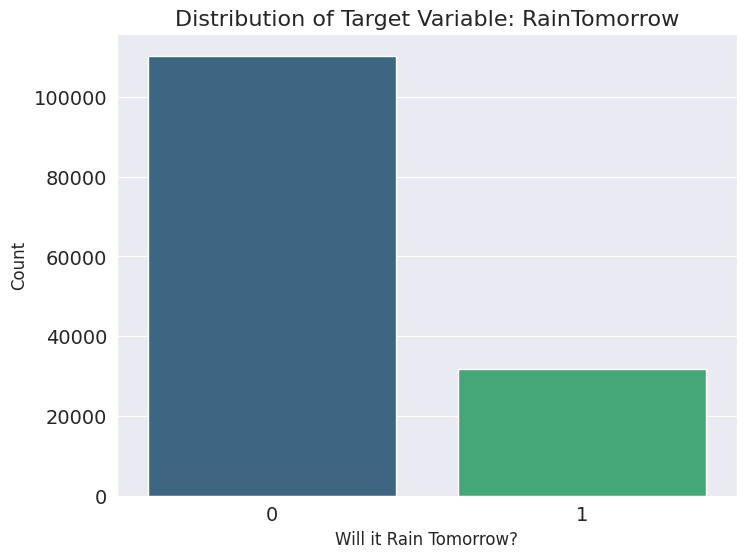

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(data=weather_data, x='RainTomorrow', palette='viridis')
plt.title('Distribution of Target Variable: RainTomorrow', fontsize=16)
plt.xlabel('Will it Rain Tomorrow?', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Text(150, 1000, 'Note: Y-axis is on a log scale')

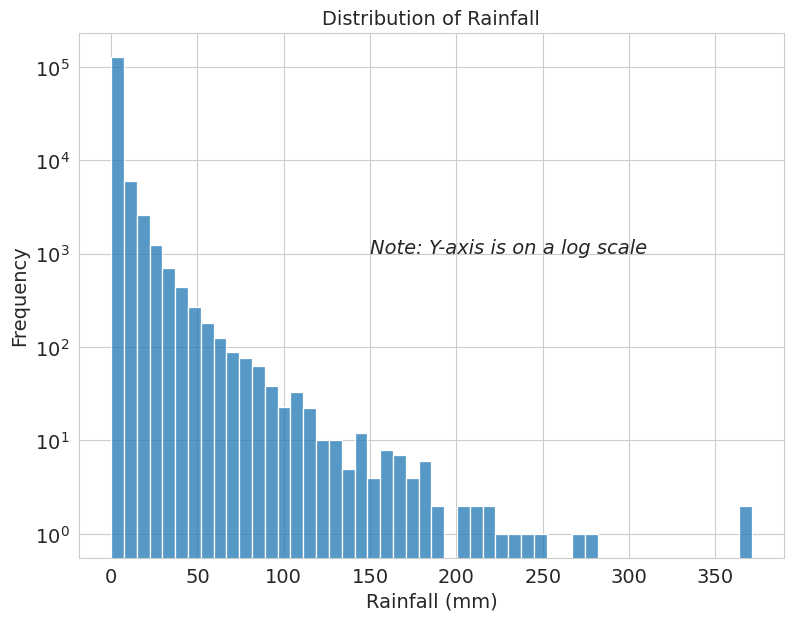

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1) # (2 rows, 2 columns, 1st subplot)
sns.histplot(weather_data['Rainfall'], kde=False, bins=50)
plt.title('Distribution of Rainfall', fontsize=14)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
# We will use a log scale on the y-axis to see the smaller values more clearly
plt.yscale('log')
plt.text(150, 1000, 'Note: Y-axis is on a log scale', style='italic')

Text(0, 0.5, 'Frequency')

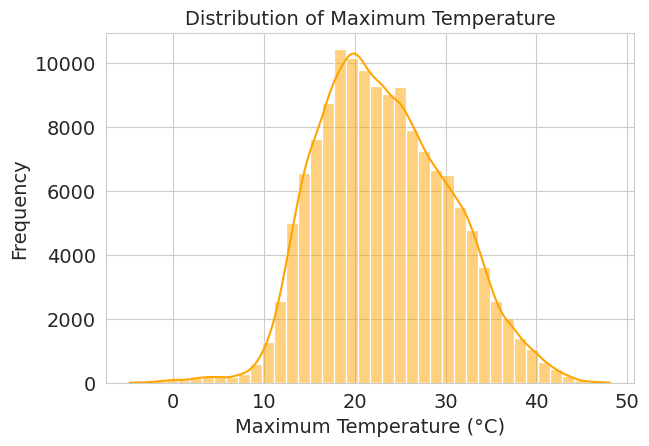

In [49]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 2) # (2 rows, 2 columns, 2nd subplot)
sns.histplot(weather_data['MaxTemp'], kde=True, bins=40, color='orange')
plt.title('Distribution of Maximum Temperature', fontsize=14)
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Humidity at 3pm (%)')

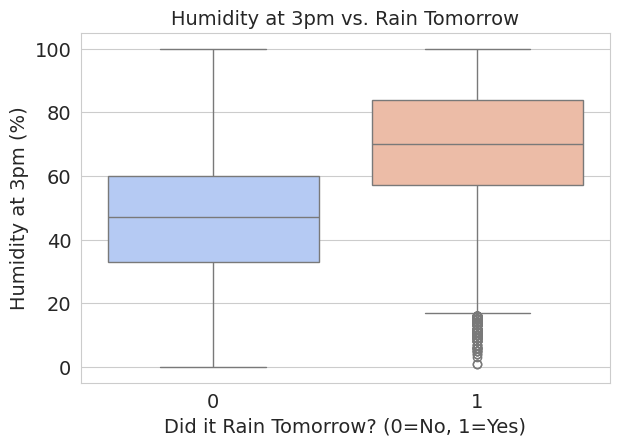

In [52]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 3) # (2 rows, 2 columns, 3rd subplot)
sns.boxplot(data=weather_data, x='RainTomorrow', y='Humidity3pm', palette='coolwarm')
plt.title('Humidity at 3pm vs. Rain Tomorrow', fontsize=14)
plt.xlabel('Did it Rain Tomorrow? (0=No, 1=Yes)')
plt.ylabel('Humidity at 3pm (%)')

Text(0, 0.5, 'Sunshine (Hours)')

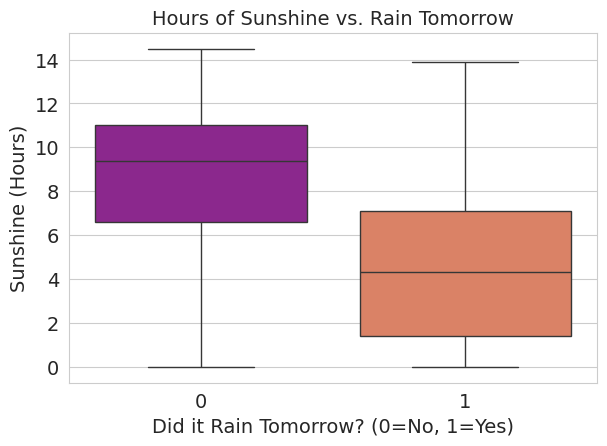

In [54]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4) # (2 rows, 2 columns, 4th subplot)
sns.boxplot(data=weather_data, x='RainTomorrow', y='Sunshine', palette='plasma')
plt.title('Hours of Sunshine vs. Rain Tomorrow', fontsize=14)
plt.xlabel('Did it Rain Tomorrow? (0=No, 1=Yes)')
plt.ylabel('Sunshine (Hours)')

Text(0.5, 1.0, 'Correlation Heatmap of All Numerical Features')

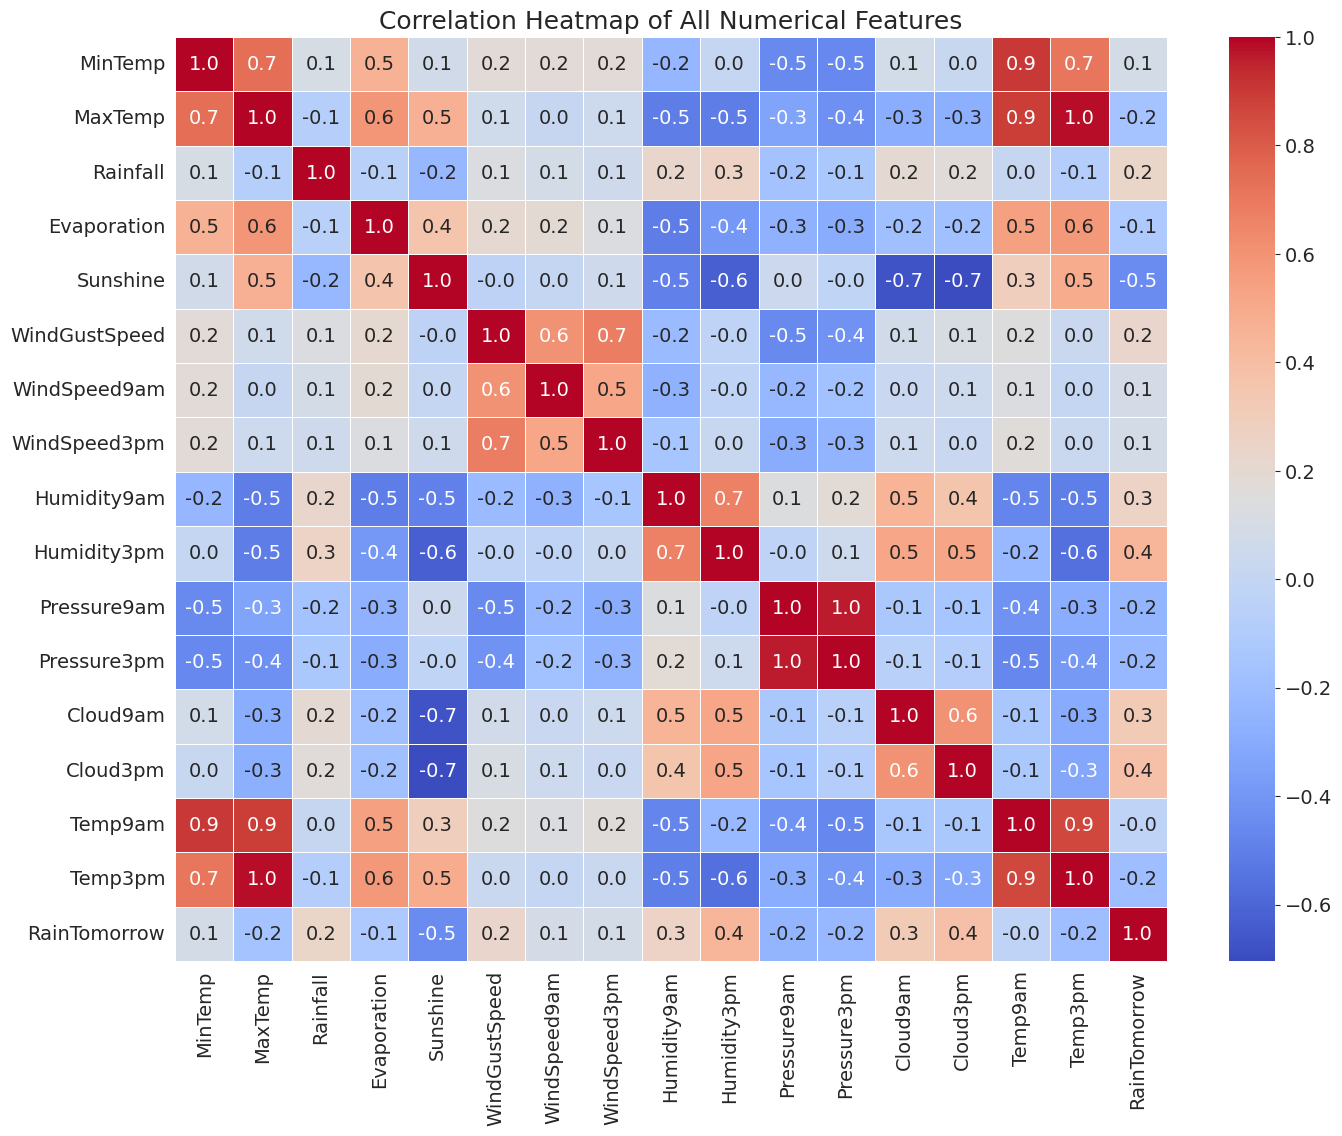

In [55]:
plt.figure(figsize=(16, 12)) # Create a new, separate figure for the large heatmap
correlation_matrix = weather_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Correlation Heatmap of All Numerical Features', fontsize=18)

# **Feature Engineering**

---



In [56]:
# --- Make a copy to avoid changing the original raw data ---
df_eng = weather_data.copy()

# --- 1. Date-Based Features ---
# First, ensure the 'Date' column is in datetime format
df_eng['Date'] = pd.to_datetime(df_eng['Date'])

# Extract year, month, and day
df_eng['Year'] = df_eng['Date'].dt.year
df_eng['Month'] = df_eng['Date'].dt.month
df_eng['Day'] = df_eng['Date'].dt.day

# It's often useful to know the day of the year as well
df_eng['DayOfYear'] = df_eng['Date'].dt.dayofyear

print("Created date-based features: Year, Month, Day, DayOfYear")

Created date-based features: Year, Month, Day, DayOfYear


In [57]:
# Daily temperature range
df_eng['TempRange'] = df_eng['MaxTemp'] - df_eng['MinTemp']

# Average temperature for the day
df_eng['AvgTemp'] = (df_eng['MinTemp'] + df_eng['MaxTemp']) / 2

print("Created temperature-based features: TempRange, AvgTemp")

Created temperature-based features: TempRange, AvgTemp


In [58]:
df_eng['PressureChange'] = df_eng['Pressure3pm'] - df_eng['Pressure9am']

print("Created pressure-based feature: PressureChange")

Created pressure-based feature: PressureChange


In [59]:
df_eng['AvgWindSpeed'] = (df_eng['WindSpeed9am'] + df_eng['WindSpeed3pm']) / 2

print("Created wind-based feature: AvgWindSpeed")

Created wind-based feature: AvgWindSpeed


In [60]:
df_eng['HumidityTemp_Interaction'] = df_eng['AvgTemp'] * (df_eng['Humidity3pm'] * 0.01)

print("Created interaction feature: HumidityTemp_Interaction")

Created interaction feature: HumidityTemp_Interaction


In [61]:
df_eng = df_eng.drop('Date', axis=1)
print("\nDropped the original 'Date' column.")


Dropped the original 'Date' column.


In [62]:
# --- Display the results ---
print("\n--- DataFrame with New Features (first 5 rows) ---")
display(df_eng.head())

print(f"\nOriginal number of columns: {len(weather_data.columns)}")
print(f"New number of columns: {len(df_eng.columns)}")


--- DataFrame with New Features (first 5 rows) ---


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1,336,9.5,18.15,-0.6,22.0,3.9930
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,2,337,17.7,16.25,-2.8,13.0,4.0625
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,3,338,12.8,19.30,1.1,22.5,5.7900
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,4,339,18.8,18.60,-4.8,10.0,2.9760
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5,340,14.8,24.90,-4.8,13.5,8.2170



Original number of columns: 23
New number of columns: 31


In [63]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Location                  142193 non-null  object 
 1   MinTemp                   141556 non-null  float64
 2   MaxTemp                   141871 non-null  float64
 3   Rainfall                  140787 non-null  float64
 4   Evaporation               81350 non-null   float64
 5   Sunshine                  74377 non-null   float64
 6   WindGustDir               132863 non-null  object 
 7   WindGustSpeed             132923 non-null  float64
 8   WindDir9am                132180 non-null  object 
 9   WindDir3pm                138415 non-null  object 
 10  WindSpeed9am              140845 non-null  float64
 11  WindSpeed3pm              139563 non-null  float64
 12  Humidity9am               140419 non-null  float64
 13  Humidity3pm               138583 non-null  float6

In [64]:
print("\n--- Preparing 'RainToday' Feature ---")
if 'RainToday' in df_eng.columns and df_eng['RainToday'].dtype == 'object':
    df_eng['RainToday'] = df_eng['RainToday'].map({'No': 0, 'Yes': 1})
    print("Converted 'RainToday' to 0s and 1s. It will be treated as CATEGORICAL in the pipeline.")

print("\n--- Final DataFrame Info ---")
df_eng.info()


--- Preparing 'RainToday' Feature ---
Converted 'RainToday' to 0s and 1s. It will be treated as CATEGORICAL in the pipeline.

--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Location                  142193 non-null  object 
 1   MinTemp                   141556 non-null  float64
 2   MaxTemp                   141871 non-null  float64
 3   Rainfall                  140787 non-null  float64
 4   Evaporation               81350 non-null   float64
 5   Sunshine                  74377 non-null   float64
 6   WindGustDir               132863 non-null  object 
 7   WindGustSpeed             132923 non-null  float64
 8   WindDir9am                132180 non-null  object 
 9   WindDir3pm                138415 non-null  object 
 10  WindSpeed9am              140845 non-null  float64
 11  WindS

# **Train Test Split**

---



In [65]:
# --- Splitting the data based on the 'Year' column ---
train_df = df_eng[df_eng.Year < 2015].copy()
val_df = df_eng[df_eng.Year == 2015].copy()
test_df = df_eng[df_eng.Year > 2015].copy()

# --- Verify the Shapes ---
print("--- DataFrame Shapes after Time-Based Splitting ---")
print("Training DataFrame shape:", train_df.shape)
print("Validation DataFrame shape:", val_df.shape)
print("Test DataFrame shape:", test_df.shape)

--- DataFrame Shapes after Time-Based Splitting ---
Training DataFrame shape: (98988, 31)
Validation DataFrame shape: (17231, 31)
Test DataFrame shape: (25974, 31)


In [66]:
train_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0,2008,12,1,336,9.5,18.15,-0.6,22.0,3.9930
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0,2008,12,2,337,17.7,16.25,-2.8,13.0,4.0625
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0,2008,12,3,338,12.8,19.30,1.1,22.5,5.7900
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0,2008,12,4,339,18.8,18.60,-4.8,10.0,2.9760
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0,2008,12,5,340,14.8,24.90,-4.8,13.5,8.2170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,24.0,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,0.0,0,2014,12,27,361,16.3,25.05,-4.3,25.0,3.2565
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,19.0,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,0.0,0,2014,12,28,362,21.7,25.95,-5.0,19.5,2.0760
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,26.0,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,0.0,0,2014,12,29,363,20.5,27.55,-3.9,17.5,2.2040
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,28.0,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,0.0,0,2014,12,30,364,18.4,29.30,-4.8,22.5,2.6370


In [67]:
val_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
2133,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,W,7.0,11.0,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,0.0,0,2015,1,1,1,22.1,22.45,-2.5,9.0,3.1430
2134,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,ESE,9.0,9.0,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,0.0,0,2015,1,2,2,24.1,27.55,-3.6,9.0,3.3060
2135,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,N,20.0,20.0,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,0.0,0,2015,1,3,3,21.2,27.70,-5.6,20.0,5.2630
2136,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,W,7.0,7.0,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,0.0,0,2015,1,4,4,7.1,29.55,-1.5,7.0,10.9335
2137,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,SE,7.0,9.0,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,0.0,0,2015,1,5,5,16.2,27.10,-2.7,8.0,9.2140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,E,35.0,20.0,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,0.0,0,2015,12,27,361,14.2,27.60,-3.1,27.5,3.3120
144914,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,ESE,30.0,31.0,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,0.0,0,2015,12,28,362,18.4,27.20,-3.8,30.5,1.9040
144915,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,SE,33.0,22.0,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,0.0,0,2015,12,29,363,19.6,27.30,-5.1,27.5,1.9110
144916,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,SSE,20.0,17.0,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,0.0,0,2015,12,30,364,18.9,29.45,-4.6,18.5,3.5340


In [68]:
test_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
2498,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,ESE,0.0,7.0,46.0,17.0,1013.4,1009.2,7.0,3.0,26.1,36.7,0.0,0,2016,1,1,1,17.2,29.00,-4.2,3.5,4.9300
2499,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,SE,9.0,17.0,54.0,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,0.0,1,2016,1,2,2,12.7,27.25,-2.7,13.0,8.1750
2500,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,ENE,11.0,39.0,62.0,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,1.0,1,2016,1,3,3,4.7,20.75,0.8,25.0,13.9025
2501,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,SSE,9.0,17.0,74.0,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,1.0,1,2016,1,4,4,6.4,20.50,-1.4,13.0,13.3250
2502,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,SSE,6.0,9.0,92.0,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,1.0,0,2016,1,5,5,7.4,19.20,-2.4,7.5,12.0960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0,2017,6,20,171,18.3,12.65,-3.5,14.0,3.4155
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0,2017,6,21,172,20.6,13.10,-4.3,12.0,3.1440
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0,2017,6,22,173,21.7,14.45,-4.4,11.0,3.0345
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0,2017,6,23,174,21.5,16.15,-4.2,9.0,3.8760


# **Input and Target Columns**

---



In [74]:
target_column = 'RainTomorrow'

# Create Training sets
X_train = train_df.drop(target_column, axis=1)
y_train = train_df[target_column]

In [71]:
# Create Validation sets
X_val = val_df.drop(target_column, axis=1)
y_val = val_df[target_column]

In [72]:
# Create Test sets
X_test = test_df.drop(target_column, axis=1)
y_test = test_df[target_column]

In [73]:
# --- Verify the Shapes ---
print("--- Final Dataset Shapes ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print("-" * 30)
print(f"Shape of X_val:   {X_val.shape}")
print(f"Shape of y_val:   {y_val.shape}")
print("-" * 30)
print(f"Shape of X_test:  {X_test.shape}")
print(f"Shape of y_test:  {y_test.shape}")

--- Final Dataset Shapes ---
Shape of X_train: (98988, 30)
Shape of y_train: (98988,)
------------------------------
Shape of X_val:   (17231, 30)
Shape of y_val:   (17231,)
------------------------------
Shape of X_test:  (25974, 30)
Shape of y_test:  (25974,)
